In [1]:
import os 
os.chdir('F:\Analytics Vidhya Al & ML\INTRODUCTION TO DATA SCIENCE\P_Big Mart Sales')

In [2]:
import pandas as pd

In [3]:
Train=pd.read_csv('Train.csv')

In [4]:
Train.shape

(8523, 11)

In [5]:
Train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ID
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA15OUT049
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC01OUT018
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN15OUT049
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800,FDX07OUT010
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,NCD19OUT013


In [6]:
Train.isnull().sum()


Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
ID                              0
dtype: int64

In [7]:
Train['Item_Weight'].fillna(Train['Item_Weight'].mean(),inplace=True)

In [8]:
Train['Item_Visibility'].fillna(Train["Item_Visibility"].mean(),inplace=True)

In [9]:
Train.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
ID                            object
dtype: object

In [10]:
Train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
pd.crosstab(Train['Outlet_Location_Type'],Train['Outlet_Size'],margins=True)

Outlet_Size,High,Medium,Small,All
Outlet_Location_Type,,,,
Tier 1,0,930,1458,2388
Tier 2,0,0,930,930
Tier 3,932,1863,0,2795
All,932,2793,2388,6113


In [12]:
Train['Outlet_Size'].fillna('Medium',inplace=True)

In [13]:
Train['Item_Fat_Content'] = Train['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

In [14]:
Train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ID
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA15OUT049
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC01OUT018
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN15OUT049
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,FDX07OUT010
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,NCD19OUT013


In [15]:
Train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
Train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [17]:
import matplotlib.pyplot as plot 
%matplotlib inline 

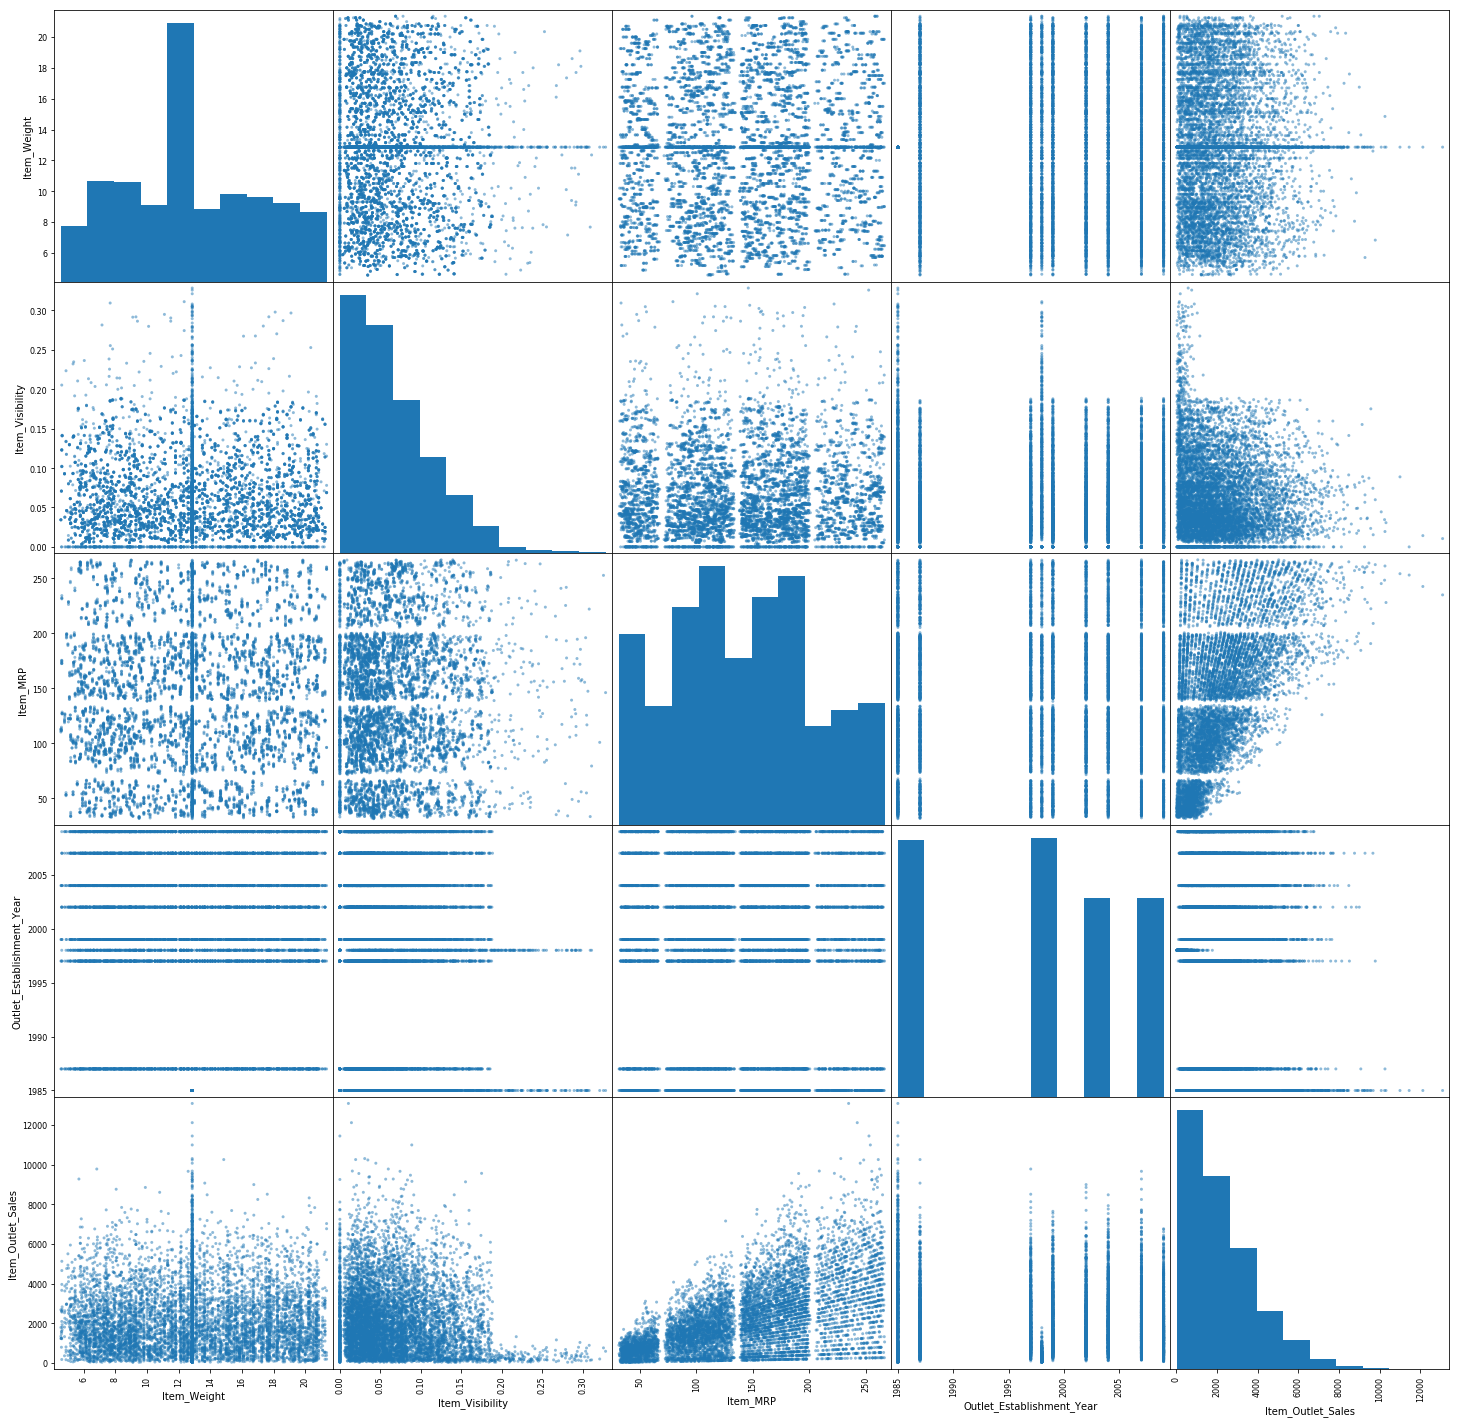

In [18]:
pd.plotting.scatter_matrix(Train,alpha=0.5,figsize=(25,25),diagonal='hist')
plot.show()

In [19]:
Train=pd.get_dummies(Train,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type'])

In [20]:
Train.shape

(8523, 34)

In [21]:
Train.isnull().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Outlet_Sales                  0
ID                                 0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Outlet_Size_High                   0
Outlet_Size_Medium                 0
Outlet_Size_Small                  0
Outlet_Location_Type_Tier 1        0
Outlet_Location_Type_Tier 2        0
Outlet_Location_Type_Tier 3        0
Outlet_Type_Grocery Store          0
Outlet_Type_Supermarket Type1      0
Outlet_Type_Supermarket Type2      0
Outlet_Type_Supermarket Type3      0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
I

In [22]:
X_Train=Train.drop(['ID','Item_Outlet_Sales'],axis=1)

In [23]:
X_Train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,1999,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,2009,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,1999,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,1998,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [24]:
Y_Train=Train['Item_Outlet_Sales']

In [25]:
Test=pd.read_csv('test.csv')

In [26]:
Test.shape

(5681, 10)

In [27]:
X_Test=Test.drop(['ID'],axis=1)

In [28]:
X_Test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [29]:
X_Test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [30]:
X_Test['Item_Weight'].fillna(X_Test['Item_Weight'].mean(),inplace= True)

In [31]:
X_Test['Item_Fat_Content'] = X_Test['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

In [32]:
X_Test['Outlet_Size'].fillna('Medium',inplace=True)

In [33]:
X_Test['Item_Visibility'].fillna(X_Test["Item_Visibility"].mean(),inplace=True)

In [34]:
X_Test=pd.get_dummies(X_Test,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type'])

In [35]:
X_Test.shape

(5681, 32)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
Linear=LinearRegression()

In [38]:
Linear.fit(X_Train,Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
Linear.score(X_Train,Y_Train)

0.5634674092368712

In [40]:
Prediction=Linear.predict(X_Test)

In [41]:
Linear.score(X_Test,Prediction)

1.0